In [1]:
install.packages("readr")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(readr)
library(dplyr)
df <- read.csv("/content/cleaned_data.csv")
head(df)

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,07-08-2025,3400,3500,3500
2,Andhra Pradesh,Chittor,Madanapalli,Tomato,Local,FAQ,07-08-2025,3800,5000,4500
3,Andhra Pradesh,Chittor,Palamaner,Cauliflower,Cauliflower,FAQ,07-08-2025,700,1200,1000
4,Andhra Pradesh,Krishna,Tiruvuru,Maize,Hybrid/Local,FAQ,07-08-2025,2250,2350,2300
5,Andhra Pradesh,Krishna,Tiruvuru,Paddy(Dhan)(Common),Sona,FAQ,07-08-2025,2500,2900,2700
6,Andhra Pradesh,Visakhapatnam,Anakapally,Gur(Jaggery),NO 3,FAQ,07-08-2025,3000,3480,3240


In [3]:
summary(df)


    State             District            Market           Commodity        
 Length:12521       Length:12521       Length:12521       Length:12521      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   Variety             Grade           Arrival_Date         Min_Price    
 Length:12521       Length:12521       Length:12521       Min.   :    0  
 Class :character   Class :character   Class :character   1st Qu.: 2000  
 Mode  :character   Mode  :character   Mode  :character   Median : 3100  
                                                          Mean   : 3576  
                                                          3rd Qu.: 4820  
                 

In [4]:
install.packages("psych")
install.packages("skimr")

library(psych)
library(skimr)

# Detailed descriptive stats
describe(df[, c("Min_Price", "Max_Price", "Modal_Price")])

# Skim for quick overview (numeric + categorical)
skim(df)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min_Price,1,12521,3576.436,1987.493,3100,3404.429,1853.250,0,10530,10530,0.7788694,0.20826556,17.76176
Max_Price,2,12521,4146.335,2185.983,3875,3960.176,2038.575,0,22000,22000,0.8673230,0.94958047,19.53562
Modal_Price,3,12521,3993.292,2102.637,3600,3826.770,2075.640,1,10700,10699,0.6952954,-0.04213947,18.79078


── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             12521 
Number of columns          10    
_______________________          
Column type frequency:           
  character                7     
  numeric                  3     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 State                 0             1   3  17     0       25          0
2 District              0             1   4  25     0      369          0
3 Market                0             1   3  35     0      945          0
4 Commodity             0             1   3  32     0      168          0
5 Variety               0             1   3  24     0      317          0
6 Grade                 0             1   3   7     0        6          0
7 Arrival_Date     

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


In [5]:
# State-wise frequency
table(df$State)

# Commodity distribution
table(df$Commodity)

# Proportion of each commodity
prop.table(table(df$Commodity))



   Andhra Pradesh             Assam             Bihar        Chandigarh 
               38               117                 5                11 
      Chattisgarh               Goa           Gujarat           Haryana 
               16                 3               530               358 
 Himachal Pradesh Jammu and Kashmir         Karnataka            Kerala 
              419                70                63               961 
   Madhya Pradesh       Maharashtra         Meghalaya          Nagaland 
              559               507                12                 9 
           Odisha            Punjab         Rajasthan        Tamil Nadu 
              279               473               164              5835 
        Telangana           Tripura     Uttar Pradesh        Uttrakhand 
              149                72              1464               198 
      West Bengal 
              209 


                           Ajwan                       Alsandikai 
                               2                                2 
                      Amaranthus                  Amla(Nelli Kai) 
                             187                               69 
                     Amphophalus                    Amranthas Red 
                              19                                1 
                           Apple      Arhar (Tur/Red Gram)(Whole) 
                             112                               37 
              Arhar Dal(Tur Dal)                         Ashgourd 
                              21                              179 
       Bajra(Pearl Millet/Cumbu)                           Banana 
                              50                              278 
                  Banana - Green                     Barley (Jau) 
                             231                               17 
                           Beans                         Beet


                           Ajwan                       Alsandikai 
                    1.597317e-04                     1.597317e-04 
                      Amaranthus                  Amla(Nelli Kai) 
                    1.493491e-02                     5.510742e-03 
                     Amphophalus                    Amranthas Red 
                    1.517451e-03                     7.986583e-05 
                           Apple      Arhar (Tur/Red Gram)(Whole) 
                    8.944972e-03                     2.955036e-03 
              Arhar Dal(Tur Dal)                         Ashgourd 
                    1.677182e-03                     1.429598e-02 
       Bajra(Pearl Millet/Cumbu)                           Banana 
                    3.993291e-03                     2.220270e-02 
                  Banana - Green                     Barley (Jau) 
                    1.844901e-02                     1.357719e-03 
                           Beans                         Beet

In [8]:
library(dplyr)

# Average price per state
df %>%
  group_by(State) %>%
  summarise(
    mean_price = mean(Modal_Price, na.rm = TRUE),
    min_price  = min(Modal_Price, na.rm = TRUE),
    max_price  = max(Modal_Price, na.rm = TRUE),
    count = n(),
    .groups = "drop"   # <- drops grouping after summarise
  )

# Average price per commodity
df %>%
  group_by(Commodity) %>%
  summarise(
    mean_price = mean(Modal_Price, na.rm = TRUE),
    sd_price   = sd(Modal_Price, na.rm = TRUE),
    count = n(),
    .groups = "drop"
  )


State,mean_price,min_price,max_price,count
<chr>,<dbl>,<dbl>,<dbl>,<int>
Andhra Pradesh,3529.211,800.0,10500,38
Assam,2442.788,466.9,7600,117
Bihar,2216.000,1300.0,3200,5
Chandigarh,2727.273,1000.0,7000,11
Chattisgarh,2162.188,1600.0,4000,16
Goa,2176.667,1440.0,3000,3
Gujarat,3947.308,125.0,10250,530
Haryana,2965.712,600.0,10500,358
Himachal Pradesh,4144.749,700.0,10500,419


Commodity,mean_price,sd_price,count
<chr>,<dbl>,<dbl>,<int>
Ajwan,6425.000,2227.38636,2
Alsandikai,4800.000,1979.89899,2
Amaranthus,2856.684,1045.22505,187
Amla(Nelli Kai),7200.725,1426.34077,69
Amphophalus,5336.842,708.84141,19
Amranthas Red,49.000,NA,1
Apple,7309.984,2606.59224,112
Arhar (Tur/Red Gram)(Whole),5919.000,803.61026,37
Arhar Dal(Tur Dal),10115.238,262.95663,21


In [11]:
df <- df %>%
  mutate(Price_Spread = Max_Price - Min_Price)


In [12]:
summary(df$Price_Spread)
mean(df$Price_Spread, na.rm = TRUE)
sd(df$Price_Spread, na.rm = TRUE)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-5000.0   120.0   400.0   569.9   600.0 14000.0 

[1] 569.8993

[1] 830.0412

In [13]:
# Average spread per commodity
df %>%
  group_by(Commodity) %>%
  summarise(avg_spread = mean(Price_Spread, na.rm = TRUE),
            max_spread = max(Price_Spread, na.rm = TRUE),
            min_spread = min(Price_Spread, na.rm = TRUE),
            count = n())

# Average spread per state
df %>%
  group_by(State) %>%
  summarise(avg_spread = mean(Price_Spread, na.rm = TRUE),
            max_spread = max(Price_Spread, na.rm = TRUE),
            count = n())


Commodity,avg_spread,max_spread,min_spread,count
<chr>,<dbl>,<dbl>,<dbl>,<int>
Ajwan,1656.00000,2500,812,2
Alsandikai,350.00000,500,200,2
Amaranthus,439.57219,1900,0,187
Amla(Nelli Kai),695.65217,2000,0,69
Amphophalus,636.84211,2500,0,19
Amranthas Red,2.00000,2,2,1
Apple,2517.02732,14000,0,112
Arhar (Tur/Red Gram)(Whole),448.70270,2250,0,37
Arhar Dal(Tur Dal),217.14286,800,25,21


State,avg_spread,max_spread,count
<chr>,<dbl>,<dbl>,<int>
Andhra Pradesh,826.3158,2500.00,38
Assam,395.9194,3700.00,117
Bihar,296.0000,500.00,5
Chandigarh,1518.1818,3000.00,11
Chattisgarh,139.1875,600.00,16
Goa,0.0000,0.00,3
Gujarat,1018.8951,8500.00,530
Haryana,817.9330,8000.00,358
Himachal Pradesh,1222.6730,14000.00,419


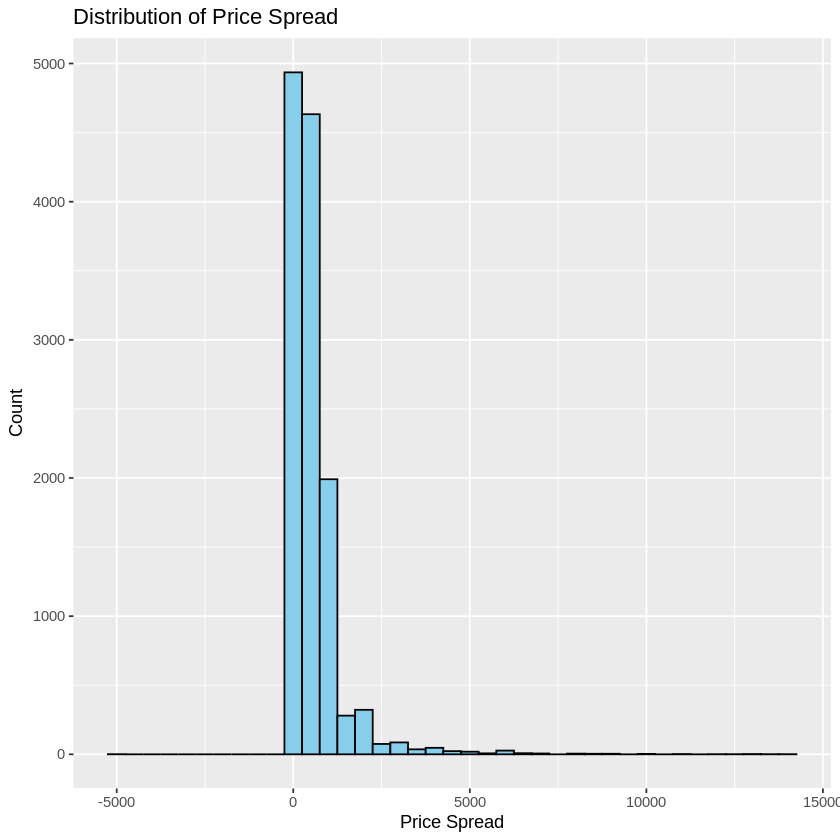

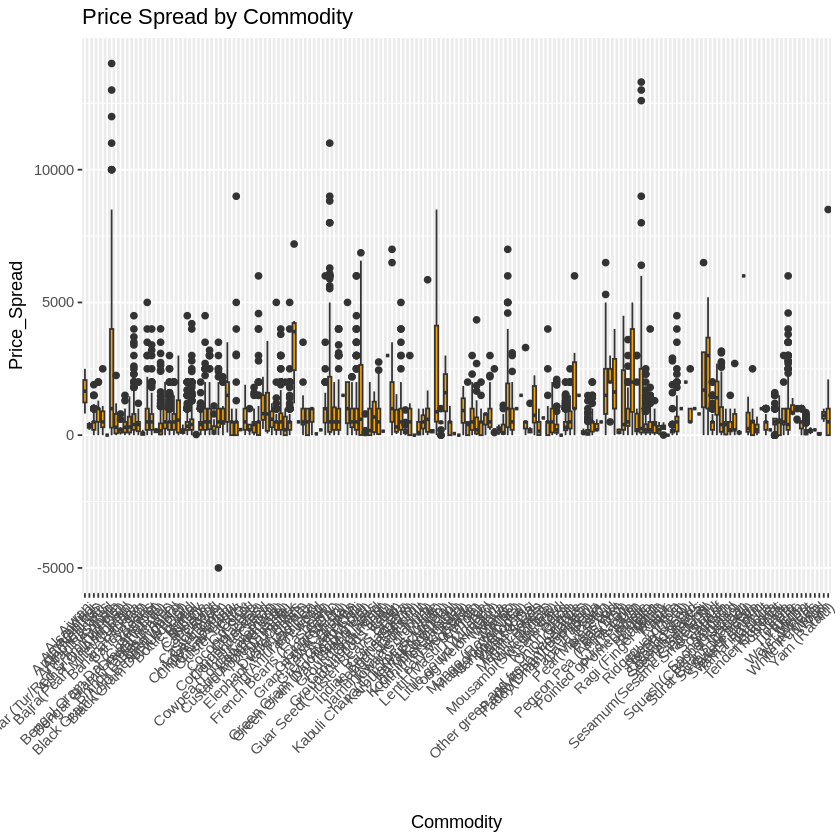

In [14]:
library(ggplot2)

# Histogram of price spread
ggplot(df, aes(x = Price_Spread)) +
  geom_histogram(binwidth = 500, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Price Spread", x = "Price Spread", y = "Count")

# Boxplot by commodity
ggplot(df, aes(x = Commodity, y = Price_Spread)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Price Spread by Commodity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
